In [3]:
import pandas as pd
import numpy as nlp
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df=pd.read_csv('perrin-freres.csv')

In [5]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [6]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [8]:
df.describe()

,Perrin Freres monthly champagne sales millions ?64-?72
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


In [9]:
print(df.isnull().sum())

Month                                                     1
Perrin Freres monthly champagne sales millions ?64-?72    2
dtype: int64


In [10]:
df.dropna(inplace=True)

In [11]:
print(df.isnull().sum())

Month                                                     0
Perrin Freres monthly champagne sales millions ?64-?72    0
dtype: int64


In [12]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [13]:
df['Month']=pd.to_datetime(df['Month'])
df.set_index('Month',inplace=True)

In [14]:
df.head()

,Perrin Freres monthly champagne sales millions ?64-?72
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


<AxesSubplot:xlabel='Month'>

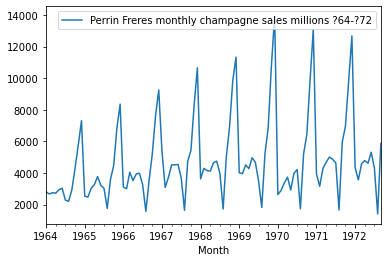

In [15]:
df.plot()

In [16]:
from statsmodels.tsa.stattools import adfuller

In [20]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [22]:
adfuller_test(df['Perrin Freres monthly champagne sales millions ?64-?72'])

ADF Test Statistic : -1.8335930563276297
p-value : 0.3639157716602417
#Lags Used : 11
Number of Observations Used : 93
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [25]:
df['Sales First Difference'] = df['Perrin Freres monthly champagne sales millions ?64-?72'] - df['Perrin Freres monthly champagne sales millions ?64-?72'].shift(1)
#differencing

In [26]:
df['Perrin Freres monthly champagne sales millions ?64-?72'].shift(1)

Month
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1972-05-01    4788.0
1972-06-01    4618.0
1972-07-01    5312.0
1972-08-01    4298.0
1972-09-01    1413.0
Name: Perrin Freres monthly champagne sales millions ?64-?72, Length: 105, dtype: float64

In [27]:
df['Seasonal First Difference']=df['Perrin Freres monthly champagne sales millions ?64-?72']-df['Perrin Freres monthly champagne sales millions ?64-?72'].shift(12)

In [29]:
df.head(14)

,Perrin Freres monthly champagne sales millions ?64-?72,Sales First Difference,Seasonal First Difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


In [30]:
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -7.626619157213163
p-value : 2.060579696813685e-11
#Lags Used : 0
Number of Observations Used : 92
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='Month'>

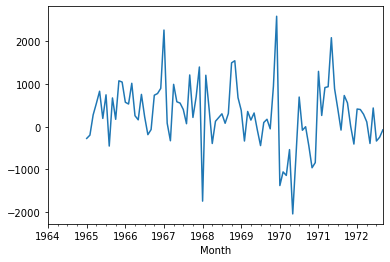

In [31]:
df['Seasonal First Difference'].plot()

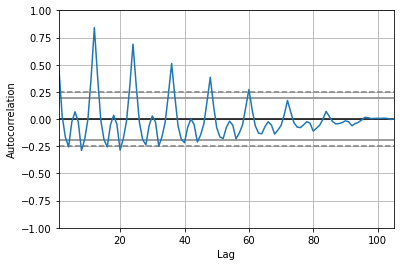

In [35]:
# Autocorrelation plot
pd.plotting.autocorrelation_plot(df['Perrin Freres monthly champagne sales millions ?64-?72'])
plt.show()

In [38]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

C:\Users\Thangaraj\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


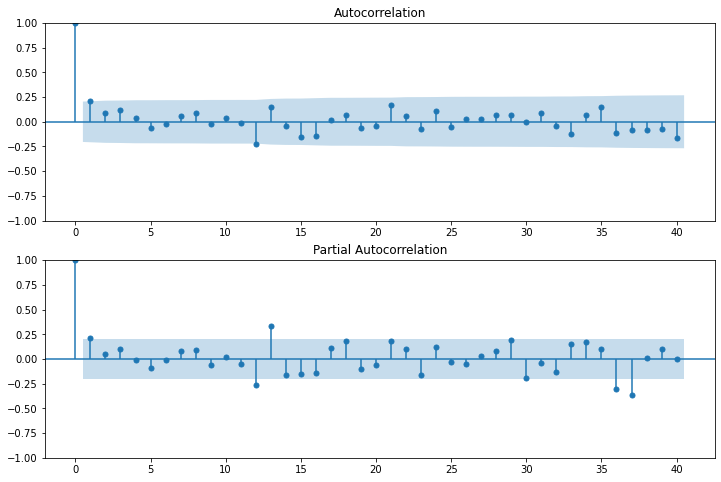

In [47]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [52]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [59]:
model = sm.tsa.arima.ARIMA(df['Perrin Freres monthly champagne sales millions ?64-?72'], order=(1, 1, 1))

# Fit the model
model_fit = model.fit()

# Get the summary of the model
print(model_fit.summary())

                                                 SARIMAX Results                                                  
Dep. Variable:     Perrin Freres monthly champagne sales millions ?64-?72   No. Observations:                  105
Model:                                                     ARIMA(1, 1, 1)   Log Likelihood                -952.814
Date:                                                    Wed, 21 Jun 2023   AIC                           1911.627
Time:                                                            17:44:38   BIC                           1919.560
Sample:                                                        01-01-1964   HQIC                          1914.841
                                                             - 09-01-1972                                         
Covariance Type:                                                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-

C:\Users\Thangaraj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Thangaraj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Thangaraj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<AxesSubplot:xlabel='Month'>

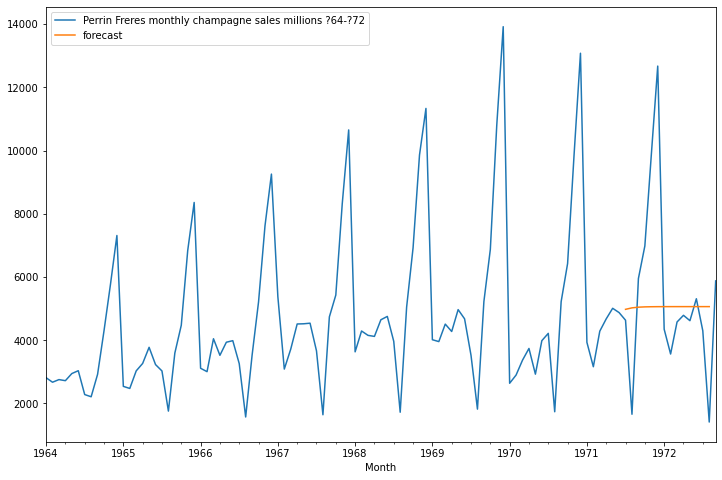

In [64]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Perrin Freres monthly champagne sales millions ?64-?72','forecast']].plot(figsize=(12,8))

In [65]:
#prediction not accurate since it is a non seasonal data

In [67]:
model=sm.tsa.statespace.SARIMAX(df['Perrin Freres monthly champagne sales millions ?64-?72'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\Thangaraj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Thangaraj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<AxesSubplot:xlabel='Month'>

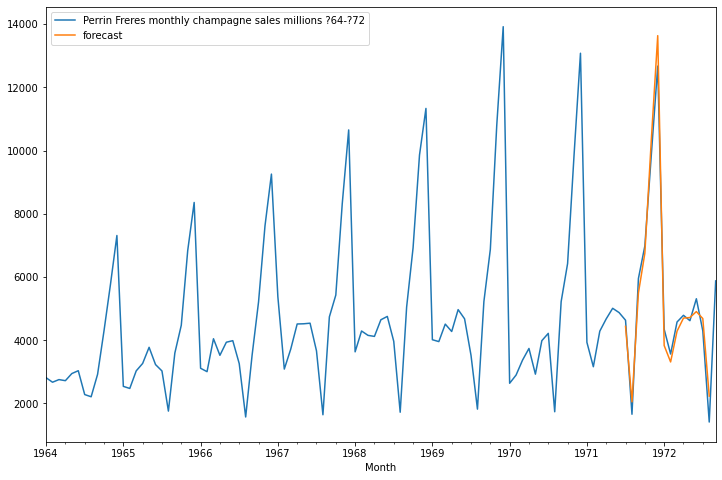

In [69]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Perrin Freres monthly champagne sales millions ?64-?72','forecast']].plot(figsize=(12,8))

In [70]:
#accurate results

In [71]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,36)]

In [74]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)


In [75]:
future_datest_df.tail()

,Perrin Freres monthly champagne sales millions ?64-?72,Sales First Difference,Seasonal First Difference,forecast
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN


In [76]:
future_df=pd.concat([df,future_datest_df])

<AxesSubplot:>

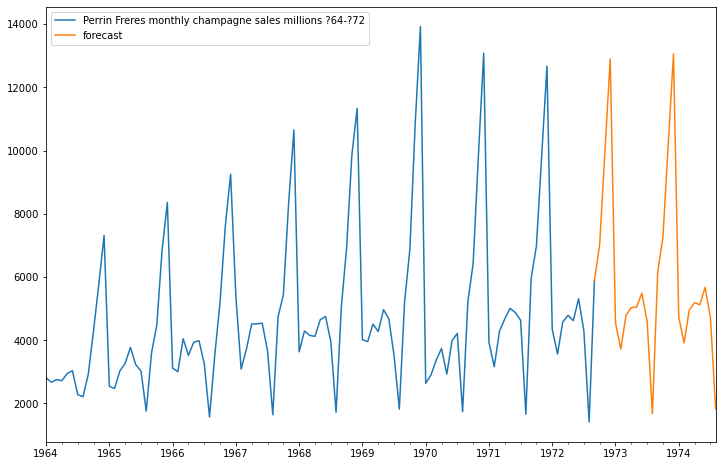

In [80]:
future_df['forecast'] = results.predict(start = 104, end = 140, dynamic= True)  
future_df[['Perrin Freres monthly champagne sales millions ?64-?72', 'forecast']].plot(figsize=(12, 8)) 